In [1]:
import gc
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

gc.enable()
# pd.options.display.float_format = "{:,.2f}".format
np.random.seed(12345)

In [2]:
data = pd.read_csv("data/Advertising.csv", index_col= 0)
print(data.head())

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

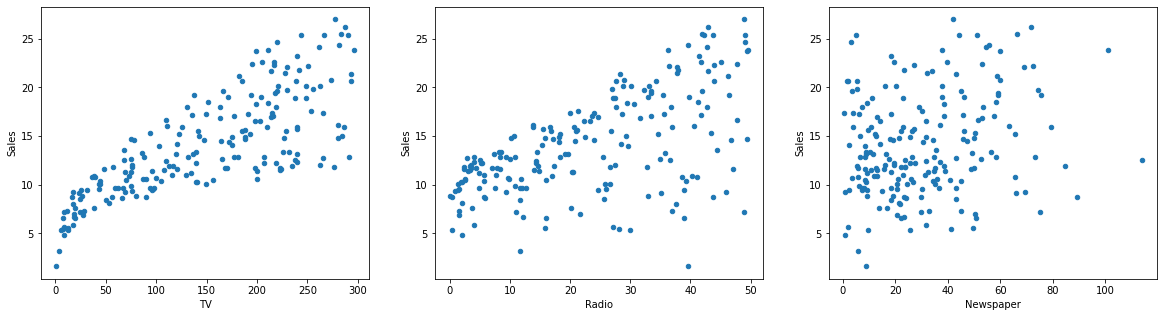

In [3]:
fig, axs = plt.subplots(1,3)
data.plot(kind='scatter', x='TV', y= 'Sales', ax=axs[0], figsize = (20,5))
data.plot(kind='scatter', x='Radio', y= 'Sales', ax=axs[1], figsize = (20,5))
data.plot(kind='scatter', x='Newspaper', y= 'Sales', ax=axs[2], figsize = (20,5))

# Linear Regression Model

In [4]:
feature_name = 'TV'
# feature_name = 'Radio'
# feature_name = 'Newspaper'

feature_columns = [feature_name]

x = data[feature_columns]
y = data['Sales']

lrmodel = LinearRegression()
lrmodel.fit(x, y)

print(f"y = mx + b = ({lrmodel.intercept_:.4f}) x + ({lrmodel.coef_[0]:.4f})")

y = mx + b = (7.0326) x + (0.0475)


In [5]:
# min max value prediction

x_test = pd.DataFrame({feature_name: [data[feature_name].min(), data[feature_name].max()]})

x_test['Result'] = lrmodel.predict(x_test)

print(x_test)

      TV     Result
0    0.7   7.065869
1  296.4  21.122454


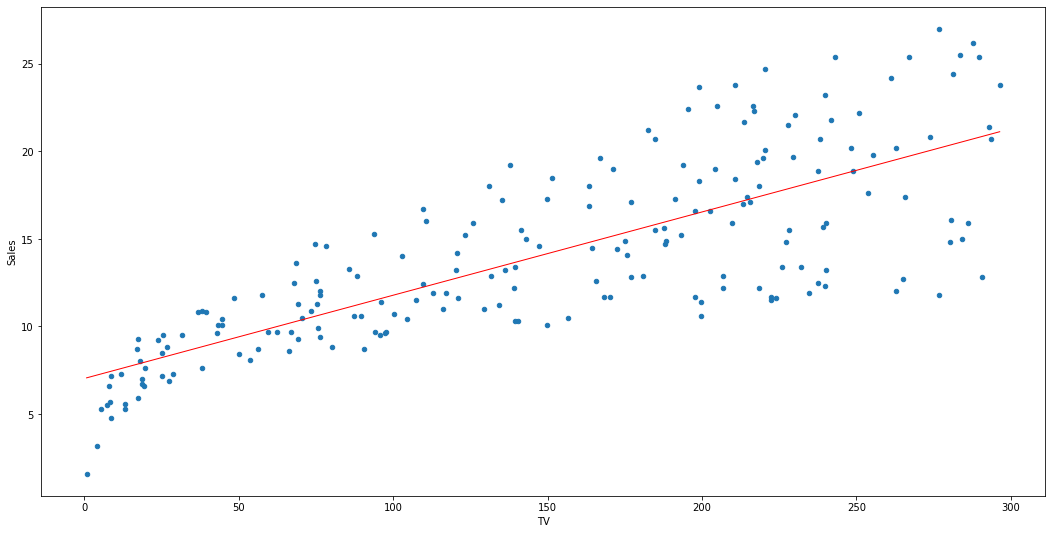

In [6]:
data.plot(kind='scatter', x = feature_name, y='Sales',figsize = (18,9))
plt.plot(x_test[feature_name], x_test['Result'], c='red', linewidth = 1)

In [7]:
# null hypothesis for the 95%

lmodel = smf.ols(formula=f'Sales ~ {feature_name}', data=data).fit()

print(lmodel.conf_int())

                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843


In [8]:
print(f"P-Values: \n{lmodel.pvalues}")

P-Values: 
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [9]:
print(f"R-squared: {lmodel.rsquared:.02f}")

R-squared: 0.61


# Multiple Linear Regression Model

In [10]:
FEATURE_COLUMNS = ['TV', 'Radio', 'Newspaper']

X = data[FEATURE_COLUMNS]
Y = data['Sales']

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)


In [11]:

mlrmodel = LinearRegression()
mlrmodel.fit(x_train,y_train)

print(f"c = {mlrmodel.intercept_:.4f}, w = {FEATURE_COLUMNS}{mlrmodel.coef_}")

c = 2.7089, w = ['TV', 'Radio', 'Newspaper'][0.04405928 0.1992875  0.00688245]


In [12]:

predictions = mlrmodel.predict(x_test)

rms = sqrt(mean_squared_error(y_test, predictions))
print(f'Root mean square: {rms:.3f}')

Root mean square: 1.949


In [13]:
selected_formula = f"Sales ~ { ' + '.join(FEATURE_COLUMNS)}"
print(selected_formula)

mlrm = smf.ols(formula= selected_formula, data=data).fit()
print(mlrm.conf_int())

Sales ~ TV + Radio + Newspaper
                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541


In [14]:
print(mlrm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.58e-96
Time:                        14:49:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [15]:
# Feature Selection:
# 1. Try out different models and only keep the predictors in the model if they have small p-valeus
# 2. Check whether the r-squared value goes up when you add new predictors.

selected_formula = f"Sales ~ { ' + '.join(FEATURE_COLUMNS[:-2])}"

mlrm = smf.ols(formula= selected_formula, data=data).fit()
print(f'{selected_formula} \nR-Squared:{mlrm.rsquared:.04f}')


Sales ~ TV 
R-Squared:0.6119


In [16]:
selected_formula = f"Sales ~ { ' + '.join(FEATURE_COLUMNS[:-1])}"

mlrm = smf.ols(formula= selected_formula, data=data).fit()
print(f'{selected_formula} \nR-Squared:{mlrm.rsquared:.04f}')

Sales ~ TV + Radio 
R-Squared:0.8972


# Categorical Predictors

adding dummy 'Size' categorical feature

In [17]:
data['Size'] = 'small'
data.loc[np.random.rand(len(data)) > 0.5, 'Size' ] = 'large'
print(data.head())

      TV  Radio  Newspaper  Sales   Size
1  230.1   37.8       69.2   22.1  large
2   44.5   39.3       45.1   10.4  small
3   17.2   45.9       69.3    9.3  small
4  151.5   41.3       58.5   18.5  small
5  180.8   10.8       58.4   12.9  large


In [18]:
data['IsLarge'] = data['Size'].map({'small':0, 'large':1})
print(data.head())

      TV  Radio  Newspaper  Sales   Size  IsLarge
1  230.1   37.8       69.2   22.1  large        1
2   44.5   39.3       45.1   10.4  small        0
3   17.2   45.9       69.3    9.3  small        0
4  151.5   41.3       58.5   18.5  small        0
5  180.8   10.8       58.4   12.9  large        1


In [19]:

FEATURE_COLUMNS = ['TV', 'Radio', 'Newspaper', 'IsLarge']

X = data[FEATURE_COLUMNS]
Y = data['Sales']

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

mlrmodel = LinearRegression()
mlrmodel.fit(x_train,y_train)

print(f"c = {mlrmodel.intercept_:.4f}, w = {mlrmodel.coef_}")

c = 2.6803, w = [0.04401877 0.1994037  0.00693408 0.05659506]


adding dummy 'Area' categorical feature

In [20]:
nums = np.random.rand(len(data))
data['Area'] = 'rural'
data.loc[ (nums > 0.33) & (nums < 0.66) , 'Area'] = 'suburban'
data.loc[ (nums > 0.66) , 'Area'] = 'urban'
print(data.head())

      TV  Radio  Newspaper  Sales   Size  IsLarge      Area
1  230.1   37.8       69.2   22.1  large        1     urban
2   44.5   39.3       45.1   10.4  small        0  suburban
3   17.2   45.9       69.3    9.3  small        0  suburban
4  151.5   41.3       58.5   18.5  small        0     urban
5  180.8   10.8       58.4   12.9  large        1  suburban


In [21]:
area_dummies = pd.get_dummies(data['Area'], prefix= 'Area').iloc[:,1:] # rural, suburban, urban

new_data = pd.concat([data, area_dummies], axis=1)
print(new_data.head())

      TV  Radio  Newspaper  Sales   Size  IsLarge      Area  Area_suburban  \
1  230.1   37.8       69.2   22.1  large        1     urban              0   
2   44.5   39.3       45.1   10.4  small        0  suburban              1   
3   17.2   45.9       69.3    9.3  small        0  suburban              1   
4  151.5   41.3       58.5   18.5  small        0     urban              0   
5  180.8   10.8       58.4   12.9  large        1  suburban              1   

   Area_urban  
1           1  
2           0  
3           0  
4           1  
5           0  


In [22]:
FEATURE_COLUMNS = ['TV', 'Radio', 'Newspaper', 'IsLarge']

X = new_data[FEATURE_COLUMNS]
Y = new_data['Sales']

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

mlrmodel = LinearRegression()
mlrmodel.fit(x_train,y_train)

print(f"c = {mlrmodel.intercept_:.4f}, w = {FEATURE_COLUMNS}{mlrmodel.coef_}")


c = 2.6803, w = ['TV', 'Radio', 'Newspaper', 'IsLarge'][0.04401877 0.1994037  0.00693408 0.05659506]
